In [1]:
import glob
import os
import librosa
import librosa.display
import numpy as np
import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# def load_sound_files(file_paths):
#     raw_sounds = []
#     for fp in file_paths:
#         X,sr = librosa.load(fp)
#         print X.shape
#         raw_sounds.append(X)
#     return raw_sounds
def load_sound_files(parent_dir,sub_dirs,file_ext='*.wav'):
    raw_sounds = []
    for labels,sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            X,sr = librosa.load(fn,mono=False)
            print X.shape
            raw_sounds.append(X)
            plt.figure(figsize=(12, 4))
            librosa.display.waveplot(X, sr)
    return raw_sounds

In [29]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    print X
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext='*.wav'):
    features, labels = np.empty((0,193)), np.empty(0)
    count=1
    for label, sub_dir in enumerate(sub_dirs):
        
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            print count
            count += 1
            mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
#             print ext_features.shape
            features = np.vstack([features,ext_features])
#             labels = np.append(labels, fn.split('/')[2].split('-')[1])
            labels = np.append(labels,sub_dir)
    return np.array(features), np.array(labels, dtype = int)

def one_hot_encode(labels):
    n_labels = len(labels)
    labels = np.array(labels)
    
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

(2, 41030)
(2, 100005)
(2, 42014)
(2, 30403)
(2, 30989)
(101982,)
(68907,)
(93713,)
(93713,)
(79932,)


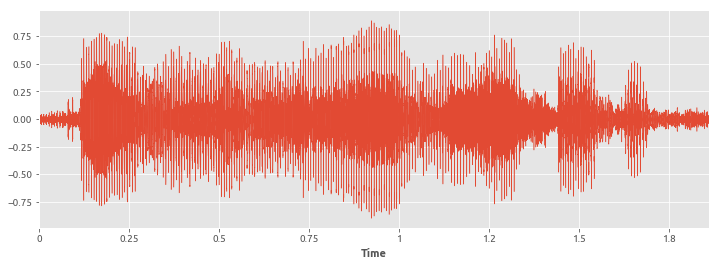

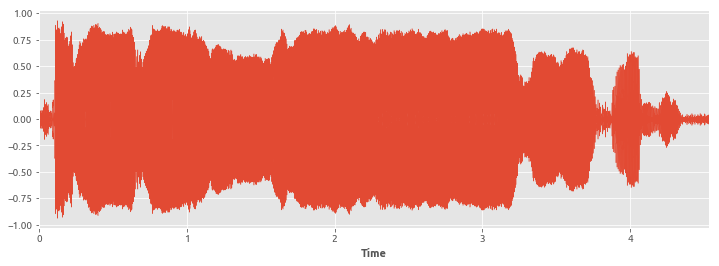

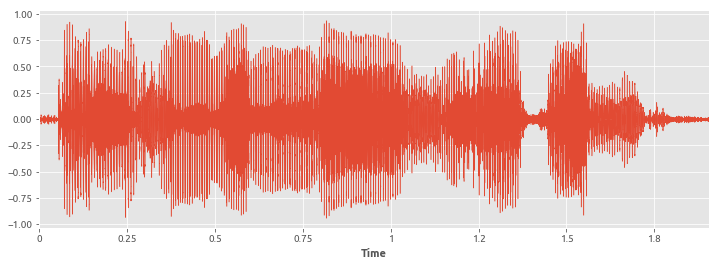

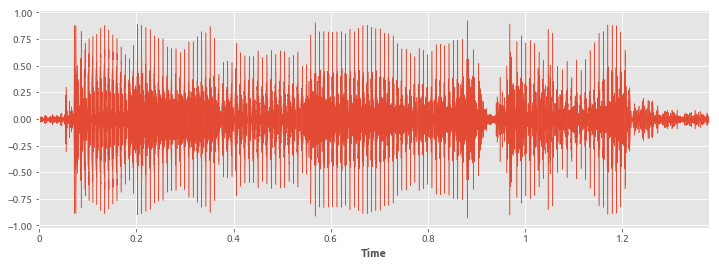

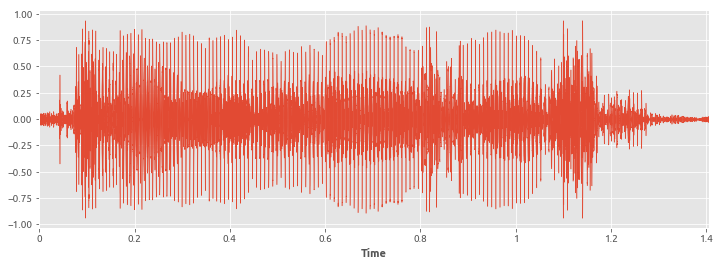

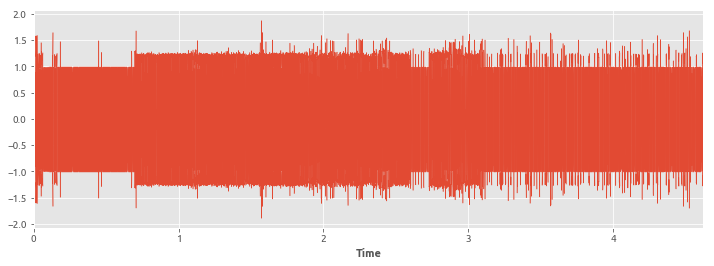

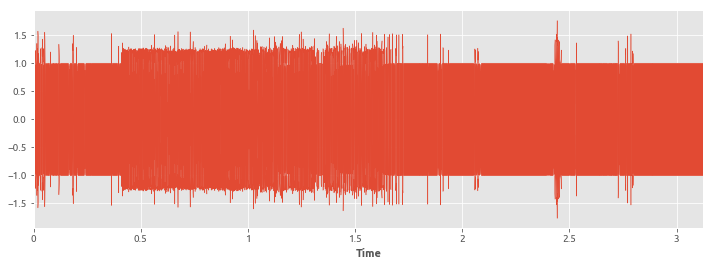

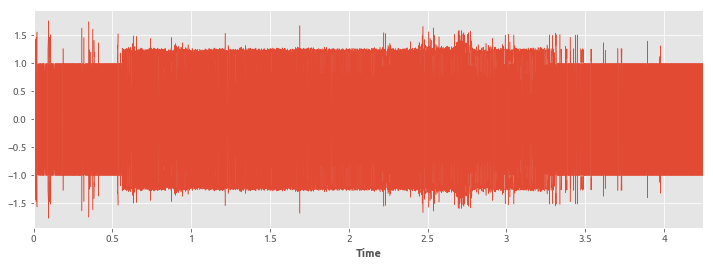

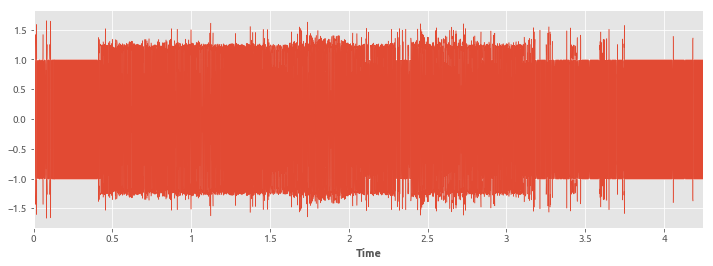

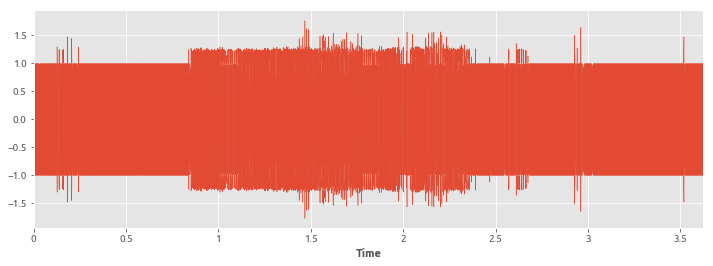

In [30]:
# # parent_dir = './smallDataSet/train'
# # sub_dirs = ['0','1']
parent_dir = './f'
sub_dirs = ['1']
# # train_x, train_y = parse_audio_files(parent_dir,sub_dirs)
a = load_sound_files(parent_dir,sub_dirs)
b = load_sound_files(parent_dir,'2')

# from scipy.io import wavfile
# fs, data = wavfile.read('./f/2/1.wav')

In [27]:
# X,R = librosa.load('./f/2/1.wav',sr=8000)
# # np.set_printoptions(threshold=6)
# print data
# N = 101982
# nX, nY = [np.pad(m, ((0,N-m.shape[0]),(0,0)), 'constant') for m in [X, Y]]

[[ 0.00016199  0.00168907  0.00275051 ... -0.01176744 -0.01190597
   0.        ]
 [ 0.00016199  0.00168907  0.00275051 ... -0.01176744 -0.01190597
   0.        ]]


In [49]:
parent_dir = './smallDataSet/test'
sub_dirs = ['1']
test_x, test_y = parse_audio_files(parent_dir,sub_dirs)
print test_y

1
[1]


In [67]:
# labels = one_hot_encode(labels)
# train_test_split = np.random.rand(len(features)) < 0.80
# train_x = features[train_test_split]
# train_y = labels[train_test_split]
# test_x = features[~train_test_split]
# test_y = labels[~train_test_split]
# train_y = one_hot_encode(train_y)
# test_y.astype(int)
# test_y = one_hot_encode(test_y)
# print "Training Examples ",train_x.shape
# print "Testing Examples ",test_x.shape
# print test_y,train_y
# test_y = np.array([0.,1.])
# print train_y[0]

--------------------------------------------------------------------------------------------------------------------------

#### Training Neural Network with TensorFlow

In [53]:
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support

In [54]:
training_epochs = 50000
# n_dim = features.shape[1]
n_dim = train_x.shape[1]
n_classes = 2
n_hidden_units_one = 10
n_hidden_units_two = 20
# n_hidden_units_three = 25
# n_hidden_units_four = 10

sd = 1 / np.sqrt(n_dim)
learning_rate = 0.001

In [55]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)

# W_3 = tf.Variable(tf.random_normal([n_hidden_units_two,n_hidden_units_three], mean = 0, stddev=sd))
# b_3 = tf.Variable(tf.random_normal([n_hidden_units_three], mean = 0, stddev=sd))
# h_3 = tf.nn.sigmoid(tf.matmul(h_2,W_3) + b_3)


# W_4 = tf.Variable(tf.random_normal([n_hidden_units_three,n_hidden_units_four], mean = 0, stddev=sd))
# b_4 = tf.Variable(tf.random_normal([n_hidden_units_four], mean = 0, stddev=sd))
# h_4 = tf.nn.sigmoid(tf.matmul(h_3,W_4) + b_4)


W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [56]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print accuracy

Tensor("Mean_3:0", shape=(), dtype=float32)


In [63]:
cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
#     y_pred1 = sess.run(tf.argmax(y_,1),feed_dict={X: features1})
#     y_true = sess.run(tf.argmax(test_y,1))
#     save_path = saver.save(sess, "model.ckpt")

In [66]:
# print np.sum(y_pred==y_true)/float(y_true.shape[0])
# print y_true
print y_pred

[0]


In [17]:
print "Accuracy= ",np.sum(y_pred==y_true)/float(y_true.shape[0])
print "Actual ",y_true
print "Predicted ",y_pred

Accuracy=  0.8125
Actual  [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Predicted  [1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1]


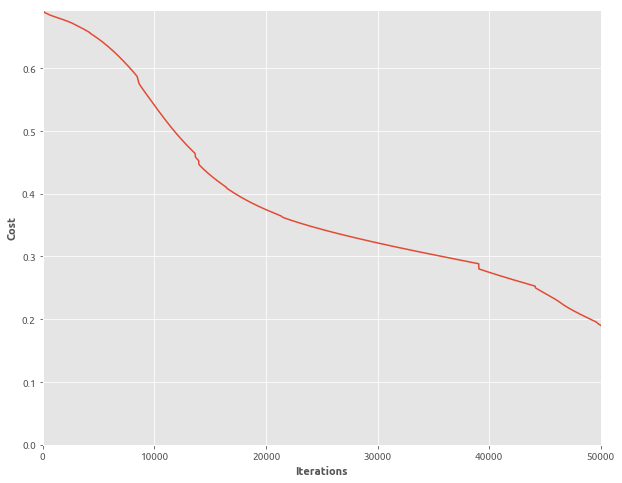

F-Score: 0.813


In [18]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print "F-Score:", round(f,3)

In [19]:
import tools as t
yTrue = np.array(y_true,dtype=str)
yPred = np.array(y_pred,dtype=str)
yTrue[yTrue=='0']="Wrongly Recited"
yTrue[yTrue=='1']="Correctly Recited"
yPred[yPred=='0']="Wrongly Recited"
yPred[yPred=='1']="Correctly Recited"
t.print_confusion_matrix(yPred.ravel(),yTrue.ravel())

Predicted,Correctly Recited,Wrongly Recited,All
Actual,,,
Correctly Recited,6,2,8
Wrongly Recited,1,7,8
All,7,9,16
